# Adidas Sales Analysis

In [31]:
# !pip install us

In [3]:
import us
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go

In [4]:
data=pd.read_excel('adidas.xlsx')
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


# Business problems that can be solved using this dataset:
- Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?

- Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?

- Profit Margin Analysis: Does the profit margin significantly impact sales?

- Efficiency of Sales Methods: Which sales method is more effective - in-store or online?

- Price Optimization: Is there a specific price range that achieves better sales than others?

- Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.

- Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.

- Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

- Predictive Sales Analysis: Develop a forecast for monthly sales.

## 0. Performing Exploratory Data Analysis (EDA)

In [5]:
data.shape

(9648, 13)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
total_revenue = data['Total Sales'].sum()
total_revenue


np.float64(899902125.0)

In [9]:
# Aggregating total sales and units sold for each product
product_sales = data.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()

# Sorting products by total sales in descending order to identify top-performing products
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False)

# Displaying the results
print("Top-Performing Products:")
top_performing_products

Top-Performing Products:


,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320
3,Women's Apparel,179038860.0,433827
1,Men's Athletic Footwear,153673680.0,435526
5,Women's Street Footwear,128002813.0,392269
0,Men's Apparel,123728632.0,306683
4,Women's Athletic Footwear,106631896.0,317236


In [10]:
underperforming_products = product_sales.sort_values(by='Total Sales', ascending=True).head()

print("\nUnderperforming Products:")
underperforming_products


Underperforming Products:


,Product,Total Sales,Units Sold
4,Women's Athletic Footwear,106631896.0,317236
0,Men's Apparel,123728632.0,306683
5,Women's Street Footwear,128002813.0,392269
1,Men's Athletic Footwear,153673680.0,435526
3,Women's Apparel,179038860.0,433827


In [11]:
print(123728632.0+153673680.0+208826244.0-(106631896.0+128002813.0+179038860.0))

72554987.0


**Insights:** Men's total sales as compare to female is higher by <b>72554987.0</b>


In [12]:
# Unique Cities
unique_cities = data['City'].unique()
print(unique_cities)
num_unique_cities = data['City'].nunique()
print(f'Number of unique cities:', num_unique_cities)

['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Portland' 'Anchorage'
 'Honolulu' 'Orlando' 'Albany' 'Cheyenne' 'Richmond' 'Detroit' 'St. Louis'
 'Salt Lake City' 'New Orleans' 'Boise' 'Phoenix' 'Albuquerque' 'Atlanta'
 'Charleston' 'Charlotte' 'Columbus' 'Louisville' 'Jackson' 'Little Rock'
 'Oklahoma City' 'Wichita' 'Sioux Falls' 'Fargo' 'Des Moines' 'Milwaukee'
 'Indianapolis' 'Baltimore' 'Wilmington' 'Newark' 'Hartford' 'Providence'
 'Boston' 'Burlington' 'Manchester']
Number of unique cities: 52


In [13]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [14]:
p=data.groupby(['Price per Unit','Region'])['Units Sold'].sum()
pd.DataFrame(p).reset_index()

,Price per Unit,Region,Units Sold
0,7.0,South,307
1,7.0,West,216
2,8.0,South,112
3,9.0,Midwest,240
4,9.0,South,283
...,...,...,...
510,103.0,Southeast,218
511,105.0,Southeast,1300
512,105.0,West,1300
513,110.0,South,1400


In [15]:
three_columns_grouped = data.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()
top_performers = three_columns_grouped.sort_values(by=['City', 'Units Sold'], ascending=[True, False]).groupby('City').head(1)
worst_performers = three_columns_grouped.sort_values(by=['City', 'Units Sold']).groupby('City').head(1)
top_performers.reset_index(drop=True, inplace=True)
print("Top Performing Retailers in Each City:")
top_performers.head(5)

Top Performing Retailers in Each City:


,City,Retailer,Units Sold
0,Albany,West Gear,47133
1,Albuquerque,Kohl's,43752
2,Anchorage,Amazon,26749
3,Atlanta,Sports Direct,41414
4,Baltimore,Foot Locker,9322


In [16]:
print("\nWorst Performing Retailers in Each City:")
worst_performers.reset_index(drop=True,inplace=True)
worst_performers.head(5)


Worst Performing Retailers in Each City:


,City,Retailer,Units Sold
0,Albany,Kohl's,10053
1,Albuquerque,Sports Direct,8881
2,Anchorage,Foot Locker,4066
3,Atlanta,Foot Locker,14977
4,Baltimore,West Gear,5647


In [17]:
# Correlation bewtween Operating Profit and Total Sales
correlation = data['Operating Profit'].corr(data['Total Sales'])
correlation


np.float64(0.9563074349716087)

In [18]:
# Correlation bewtween Operating Profit and Total Sales
correlation = data['Operating Profit'].corr(data['Units Sold'])
correlation

np.float64(0.8923793765537954)

Moreover, to add more, there is also a positive correlation between Units Sold and Operating Profit

The correlation is positive, 0.9563
This shows that as the Total Sales go up the Operating Profit also go up.
So the answer to question 3 is YES. Operating Profit does affect Units Sold in a positive way

# 4. Efficiency of Sales Methods: Which sales method is more effective - in-store or online?

In [19]:
sales_method_col = data['Sales Method']
unique_sales_method_col = sales_method_col.unique()
unique_sales_method_col

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [20]:
from us import states
state_column = data['State']
state_abbreviations = []
for state in state_column:
    try:
        # Lookup state by name or existing abbreviation
        state_abbreviation = states.lookup(state).abbr
    except AttributeError:
        # In case the state is not found, set the abbreviation to None
        state_abbreviation = None
    state_abbreviations.append(state_abbreviation)

# Create a new column in the dataframe with the two-letter abbreviations
data['State Abbreviation'] = state_abbreviations
# Checking the contents of the new column
data['State Abbreviation'].unique()

array(['NY', 'TX', 'CA', 'IL', 'PA', 'NV', 'CO', 'WA', 'FL', 'MN', 'MT',
       'TN', 'NE', 'AL', 'ME', 'AK', 'HI', 'WY', 'VA', 'MI', 'MO', 'UT',
       'OR', 'LA', 'ID', 'AZ', 'NM', 'GA', 'SC', 'NC', 'OH', 'KY', 'MS',
       'AR', 'OK', 'KS', 'SD', 'ND', 'IA', 'WI', 'IN', 'WV', 'MD', 'DE',
       'NJ', 'CT', 'RI', 'MA', 'VT', 'NH'], dtype=object)

In [21]:
data.head(4)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State Abbreviation
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NY
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NY
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NY
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NY


In [22]:
data['Total Sales'] = data['Total Sales'].replace('[\$,]', '', regex=True).astype(float)
fig = go.Figure()
# List of unique products and sales methods
products = data['Product'].unique()
sales_methods = data['Sales Method'].unique()

# Add traces for each combination of product and sales method
for product in products:
    for method in sales_methods:
        filtered_data = data[(data['Product'] == product) & (data['Sales Method'] == method)]
        state_sales = filtered_data.groupby('State Abbreviation')['Total Sales'].sum().reset_index()
        fig.add_trace(
            go.Choropleth(
                locations=state_sales['State Abbreviation'],
                z=state_sales['Total Sales'],
                locationmode='USA-states',
                colorscale='Viridis',
                name=f"{product} - {method}",
                showscale=True,
                visible=False  # Initially, all traces are hidden
            )
        )

# Update layout with dropdown menus
product_buttons = [
    {'label': product, 'method': 'update', 'args': [{'visible': [trace.name.startswith(product) for trace in fig.data]}]}
    for product in products
]

sales_method_buttons = [
    {'label': method, 'method': 'update', 'args': [{'visible': [method in trace.name for trace in fig.data]}]}
    for method in sales_methods
]

fig.update_layout(
    updatemenus=[
        {'buttons': product_buttons, 'direction': 'down', 'showactive': True, 'x': 0.25, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'},
        {'buttons': sales_method_buttons, 'direction': 'down', 'showactive': True, 'x': 0.75, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'}
    ],
    geo=dict(scope='usa'),
    title="Total Sales by State, Product, and Sales Method"
)

# Initially displaying the first product and first sales method
if fig.data:
    fig.data[0].visible = True

fig.show()

In [23]:
#Which method is best
# Segmenting and aggregating data by 'Sales Method'
sales_method_grouped = data.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Profit': 'sum'})

# Calculating the Operating Margin for each sales method
sales_method_grouped['Operating Margin'] = sales_method_grouped['Operating Profit'] / sales_method_grouped['Total Sales']

sales_method_grouped

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,1.275913e+08,0.357756
Online,247672882.0,9.655518e+07,0.389850
Outlet,295585493.0,1.079883e+08,0.365337


Interpreting the above table in words for easier understanding.
Total Sales:
• In-store:
247,672,882 • Outlet: $295,585,493 In-store sales have the highest total sales, followed by outlet and then online sales.

Operating Profit:
• In-store:
96,555,180 (approximately) • Outlet: $107,988,300 (approximately) Similar to total sales, in-store sales lead in operating profit, followed by outlet and then online.

Operating Margin (Operating Profit divided by Total Sales):
• In-store: 0.357756 (or 35.78%) • Online: 0.389850 (or 38.99%) • Outlet: 0.365337 (or 36.53%)

Here, while in-store sales have the highest total sales and profit, online sales have the highest operating margin, indicating a higher profitability relative to the sales generated. Insights: • In terms of Total Sales and Operating Profit: In-store sales method is the most effective, generating the highest total sales and operating profit. • In terms of Operating Margin: Online sales are the most effective, indicating that although the total sales and operating profit are lower than in-store, the profitability relative to the sales generated is higher.

When deciding which sales method is more effective, it depends on what the business prioritizes. If the focus is on maximizing total revenue and profit, then in-store sales are more effective. However, if the focus is on efficiency in terms of profit generated per dollar of sales, then online sales are more effective.

# 5. Price Optimization: Is there a specific price range that achieves better sales than others?

In [24]:
# Define the price bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

# Create a new column for the price range
data['Price Range'] = pd.cut(data['Price per Unit'], bins)

# Group by the price range and sum the total sales
sales_by_price_range = data.groupby('Price Range')['Total Sales'].sum().reset_index()

# Sorting the results to see which price range has the highest sales
sorted_sales_by_price_range = sales_by_price_range.sort_values(by='Total Sales', ascending=False)

# Results are sorted based on Total Sales
sorted_sales_by_price_range

<ipython-input-24-68a531f08ba6>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Price Range,Total Sales
4,"(40, 50]",220666307.0
5,"(50, 60]",210865002.0
6,"(60, 70]",190679285.0
3,"(30, 40]",134726187.0
7,"(70, 80]",52787579.0
8,"(80, 90]",33547420.0
2,"(20, 30]",29636023.0
9,"(90, 100]",14468685.0
1,"(10, 20]",6574478.0
11,"(110, 120]",3080000.0


Interpreting the above table in words for easier understanding
The highest total sales are in the price range of
50 ($220,666,307), indicating that products priced within this range are very popular or in high demand.
The next highest sales are in the price ranges of
60 (
60 to
190,679,285). These ranges also appear to be effective in terms of sales.
As the price increases beyond
70 to
52,787,579.
The lowest sales figures are observed in the extreme low end (
10) and high end (
130) of the price spectrum.
Insights:
• Products priced in the mid-range (specifically between
70) seem to be achieving the best sales. This could indicate a sweet spot for pricing where customers are more willing to purchase.

• Very low-priced products (below
90) show significantly lower sales. This might be due to various factors like perceived value, product quality, target customer segment, or availability.

• The
130 range shows no sales, indicating either a lack of products in this range or no demand for products at this price point.

Conclusion:
• A specific price range, notably between
70, does achieve better sales compared to other ranges.

• Understanding the reasons behind this trend would require additional qualitative analysis, such as customer preferences, product types within each price range, market competition, and promotional strategies.

• This insight can be useful for pricing strategies, inventory management, and marketing campaigns, focusing more on the price ranges that have shown higher sales volumes.

# 6. Product Portfolio Optimization: Determine which products are most profitable, segmented by location.

In [25]:
# Grouping data by location and product
grouped_data = data.groupby(['City', 'Product']).agg({'Operating Profit': 'sum', 'Total Sales': 'sum'}).reset_index()

# Calculating Profit Margin
grouped_data['Profit Margin'] = grouped_data['Operating Profit'] / grouped_data['Total Sales']

# Sorting within each location to find the most profitable products
grouped_data.sort_values(by=['City', 'Profit Margin'], ascending=[True, False], inplace=True)

# Optionally, display the top 5 most profitable products for each city
top_products_by_city = grouped_data.groupby('City').head(5)

top_products_by_city

,City,Product,Operating Profit,Total Sales,Profit Margin
3,Albany,Women's Apparel,2343150.19,4779109.0,0.490290
2,Albany,Men's Street Footwear,2649927.25,5773987.0,0.458942
0,Albany,Men's Apparel,1354932.08,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329200.59,3829596.0,0.347086
4,Albany,Women's Athletic Footwear,908094.68,2973011.0,0.305446
...,...,...,...,...,...
309,Wilmington,Women's Apparel,1016327.95,2520405.0,0.403240
310,Wilmington,Women's Athletic Footwear,500967.12,1242580.0,0.403167
311,Wilmington,Women's Street Footwear,605627.89,1502297.0,0.403135
308,Wilmington,Men's Street Footwear,1244055.88,3522197.0,0.353205


In [26]:
# Grouping data by product and city and summing total sales
grouped_data = data.groupby(['Product', 'City'])['Total Sales'].sum().reset_index()

# For each product, find the city where it performs the best and the worst
best_worst_performing_cities = []

for product in grouped_data['Product'].unique():
    product_data = grouped_data[grouped_data['Product'] == product]
    best_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].max()]
    worst_city = product_data[product_data['Total Sales'] == product_data['Total Sales'].min()]
    best_worst_performing_cities.extend([best_city, worst_city])

# Concatenating the results into a single DataFrame
best_worst_performing_cities_data = pd.concat(best_worst_performing_cities).reset_index(drop=True)

# Display the results
print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_cities_data

Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


Sales and Profitability Analysis by Location
Profitability Insights:

In Albany, 'Women's Apparel' and 'Men's Street Footwear' are highly profitable, with profit margins around 49% and 46%, respectively. Wilmington shows a different trend with 'Women's Apparel', 'Women's Athletic Footwear', and 'Women's Street Footwear' leading in profitability, each around 40%.

Sales Performance Insights:

New York excels in sales of 'Men's Apparel', 'Men's Athletic Footwear', and 'Women's Athletic Footwear', indicating a strong market for these products. Charleston and San Francisco are top performers for 'Men's Street Footwear' and 'Women's Street Footwear', respectively. Omaha consistently shows the lowest sales across various products, suggesting limited market penetration or demand.

Overall Implications:

Product popularity and profitability vary significantly by city, indicating the need for tailored marketing and sales strategies in different locations. The contrasting trends between cities like Albany, Wilmington, and Omaha highlight diverse consumer preferences, underscoring the importance of a location-specific approach in sales and marketing strategies.

# 7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.

In [27]:
# Convert the dictionary to a DataFrame, if not already done
data = pd.DataFrame(data)

# Grouping Data by both City and Store Name
grouped_data = data.groupby(['City', 'Retailer']).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum'
}).reset_index()

# Calculating Performance Metrics
grouped_data['Profit Margin'] = grouped_data['Operating Profit'] / grouped_data['Total Sales']

# Sorting by Total Sales and Profit Margin
grouped_data = grouped_data.sort_values(by=['City', 'Total Sales', 'Profit Margin'], ascending=[True, False, False])

# Displaying the grouped data
print("Store Performance by City:")
grouped_data

Store Performance by City:


,City,Retailer,Total Sales,Operating Profit,Profit Margin
1,Albany,West Gear,20735165.0,8062399.80,0.388827
0,Albany,Kohl's,3692639.0,1367451.11,0.370318
2,Albuquerque,Kohl's,17065965.0,5783668.15,0.338901
3,Albuquerque,Sports Direct,2799051.0,954392.26,0.340970
4,Anchorage,Amazon,13365025.0,4143804.75,0.310048
...,...,...,...,...,...
103,St. Louis,West Gear,1701133.0,681457.25,0.400590
105,Wichita,Kohl's,6451914.0,2279774.62,0.353349
104,Wichita,Foot Locker,3520950.0,1230372.67,0.349443
106,Wilmington,Foot Locker,8387568.0,3077352.68,0.366895


Summary

The data has been aggregated to show the performance of different retail stores in various cities. The key metrics considered are Total Sales, Operating Profit, and Profit Margin. Stores are grouped by city and retailer, providing a clear view of each store's performance in its respective location.

Insights

Top Performers:

In Albany, 'West Gear' emerges as the top performer with a total sales of approximately
3.7 million with a profit margin of 37%. In Albuquerque, 'Kohl's' leads with a total sales of $17.1 million and a profit margin of approximately 33.9%.

Comparative Store Performances:

In cities with multiple listed retailers, such as Albuquerque and Wichita, there is a noticeable difference in both sales and profit margins between stores. For example, in Albuquerque, 'Kohl's' not only has higher total sales but also a slightly lower profit margin compared to 'Sports Direct'.

Profit Margins Analysis:

Profit margins vary across cities and stores. While 'West Gear' in St. Louis has a high profit margin of 40.1%, other stores like 'Amazon' in Anchorage show lower profit margins (31%).

Sales vs. Profit Margins:

There is not always a direct correlation between high sales and high profit margins. For instance, 'Kohl's' in Wichita has higher sales than 'Foot Locker' in the same city, yet their profit margins are fairly close (35.3% for Kohl's vs. 34.9% for Foot Locker).

Regional Variations:

The data indicates potential regional variations in store performance. Stores in different cities under the same brand (like 'Kohl's' in Albany vs. Albuquerque) show different levels of sales and profit margins, suggesting that location is a significant factor in retail performance.

Conclusion


# 8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

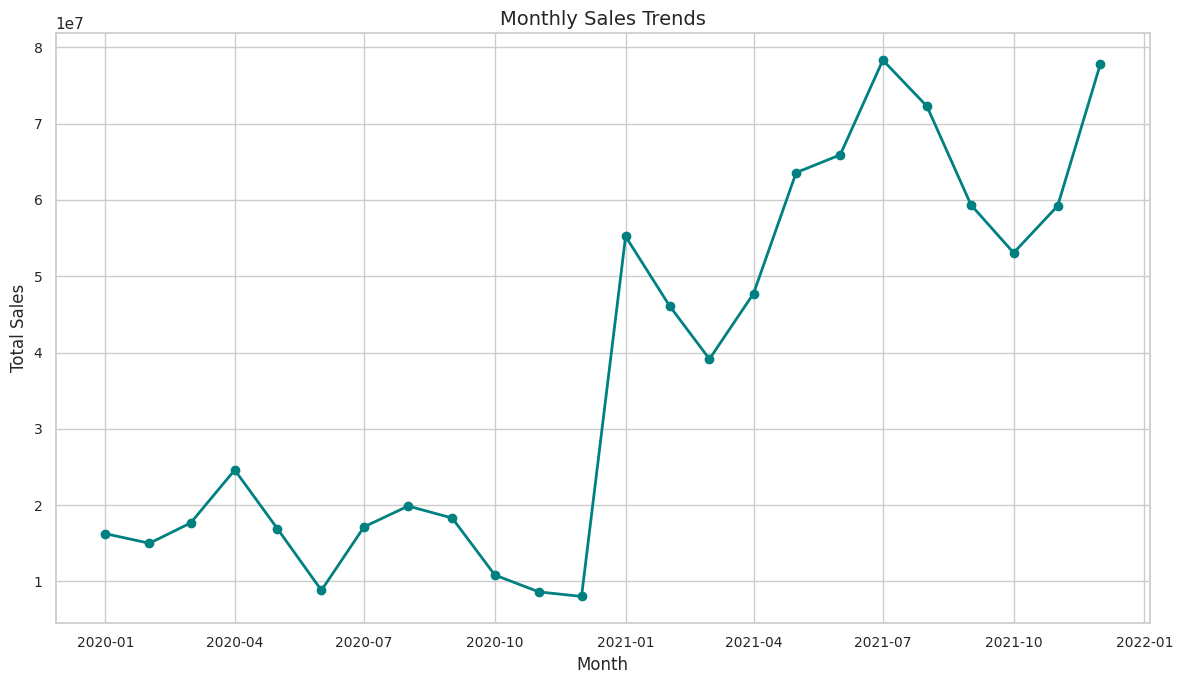

In [28]:
# Group by month and calculate total sales for each month
monthly_sales = data.groupby(data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Setting the style for a more aesthetic plot
sns.set(style="whitegrid")

# Plotting the sales trends over time
plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()

In [29]:
# Calculate the difference between consecutive months for trend analysis
diff = monthly_sales.diff()

# Define the threshold for significant change (seasonality)
seasonality_threshold = 10000

# Check for seasonality
if (diff.abs() > seasonality_threshold).any():
    print("These sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all():
    print("There is an increasing trend in sales.")
elif (diff < 0).all():
    print("There is a decreasing trend in sales.")
else:
    print("There is no consistent trend in sales.")

These sales follow a seasonality.
There is no consistent trend in sales.


Summary:
Monthly sales data from January 2020 to January 2022 exhibit significant variability with notable peaks around April 2021 and consistent increases in December and April of each year, potentially correlating with holiday seasons and sales promotions. The data show a general upward trend in sales over the two-year period, despite some notable dips, particularly in July 2020 and October 2021.

Insights:
The observed seasonal patterns, with sales spikes and dips, highlight the importance of understanding customer purchasing behavior and the impact of seasonality on sales. By leveraging these insights, businesses can align their marketing efforts, inventory management, and resource allocation with anticipated periods of high demand, ensuring that opportunities are maximized during peak seasons. This strategic approach can lead to better preparation for demand surges, improved customer satisfaction, and overall enhanced business performance.

# 9. Predictive Sales Analysis: Develop a forecast for monthly sales.

<ipython-input-30-dba3dd08ca4e>:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



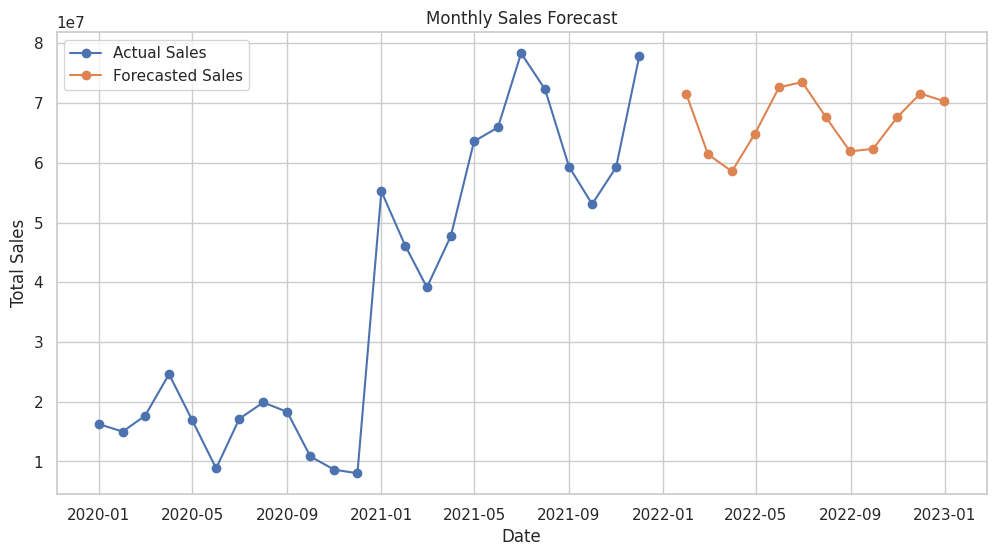

In [30]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()
# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()